# Autoencoders Variacionales 

<a href="https://colab.research.google.com/github/beangoben/deep_learning_escuela_verano_19/blob/master/notebooks/3a_VAE_molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### si usas colab corre esto:

In [2]:
!pip install --upgrade --force-reinstall tf-nightly-gpu-2.0-preview
!rm -rf deep_learning_escuela_verano_19
!git clone https://github.com/beangoben/deep_learning_escuela_verano_19

    100% |████████████████████████████████| 368.1MB 55kB/s eta 0:00:011   23% |███████▋                        | 87.8MB 628kB/s eta 0:07:27    24% |████████                        | 91.3MB 742kB/s eta 0:06:13    86% |███████████████████████████▊    | 318.3MB 573kB/s eta 0:01:27MB/s eta 0:00:01
    100% |████████████████████████████████| 1.2MB 847kB/s ta 0:00:01
    100% |████████████████████████████████| 17.3MB 597kB/s ta 0:00:011
    100% |████████████████████████████████| 450kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 664kB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 442kB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 284kB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 205kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 221kB/s ta 0:00:011

## Import libraries


In [ ]:
import os
import sys
# scientific python stack
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML/DL
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tkl
#import tensorflow_probability as tfp
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(tfk.__version__))
#print('Tf-prob:{}'.format(tfp.__version__))

# Modelos generativos

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/generative_descriminative.png?raw=true)


# VAE para fingerprints moleculares

In [22]:
def str2arr(astr):
    arr = astr.replace('\n','').replace('[','').replace(']','')
    arr = np.array([int(i) for i in arr.split()])
    return arr

data_dir='../data'
df = pd.read_csv(os.path.join(data_dir,'zinc_19k_fp.csv'))
df['fp']=df['fp'].apply(str2arr)
print(df.shape)
df.head()

(19659, 4)


,canon_smiles,fp,logp,qed
0,CC(C)(Br)Br,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.5123,0.528958
1,CCC#CI,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",1.7923,0.393400
2,OCC#CI,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.3746,0.423556
3,CC(C)(C)I,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.2199,0.399579
4,OCCC#CI,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.7647,0.484526


## Paso 1: Conoce tus datos!

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia3/fp.png?raw=true)


In [23]:
df['fp'].iloc[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Design matrix ($x$)

In [24]:
#from sklearn.preprocessing import StandardScaler
train_index,test_index = train_test_split(df.index,test_size=0.2)
x = np.vstack(df['fp'].tolist()).astype(np.float32)
y = df['logp'].values.reshape(-1,1).astype(np.float32)
x_train,x_test = x[train_index],x[test_index]
y_train,y_test = y[train_index],y[test_index]
print(x.shape,y.shape)

(19659, 512) (19659, 1)


## PCA : Descomposiciones lineales de los datos

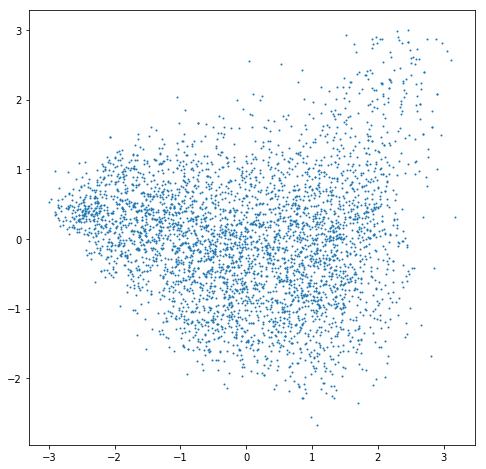

In [27]:
from sklearn.decomposition import PCA

model = PCA(2)
x_pca = model.fit_transform(x_test)
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],s=1)
plt.show()

## A construir PCA (un linear autoencoder!!)





In [ ]:
tfkl = tf.keras.layers

latent_dim=2
input_dim = x.shape[-1]
encoder = tf.keras.Sequential([
        tfkl.InputLayer(input_shape=[input_dim]),
        tfkl.Dense(latent_dim,activation=None)])
decoder = tf.keras.Sequential([
        tfkl.InputLayer(input_shape=[latent_dim]),
        tfkl.Dense(input_dim,activation=None)])

ae = tfk.Model(inputs=encoder.inputs,outputs=decoder(encoder.outputs)) 
ae.compile('adam',loss='mse')
ae.summary()
ae.fit(x_train,x_train,batch_size=64,epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
_________________________________________________________________
sequential_1 (Sequential)    (None, 512)               1536      
Total params: 2,562
Trainable params: 2,562
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


## Encodificar, decodificar

In [0]:
z = encoder.predict(x_test)
recon_x = decoder.predict(z)
print(np.abs(recon_x[0]-x[0]))
print(np.linalg.norm(recon_x[0]-x[0]))

[0.31166023 0.5437786  0.2889977  0.19840384 0.42521322 0.1198729
 0.27394935 0.22606063 0.32803932 0.23109004 0.09120739 0.22564851
 3.7043102  0.2216396  0.2730966  0.44113305 0.19537118 0.24350336
 0.26745456 0.34508315 0.19347456 0.19693413 0.1722098  0.2737955
 0.22407806 0.29270414 0.19301935 0.27678454 0.27736512 0.2262696
 0.20904249 0.3973123  0.4026225  0.6832319  0.27705702 0.22220744
 0.3192343  0.23917119 0.22488035 0.21457878 0.29504693 0.54253525
 0.34545577 0.24494566 0.18316084 0.31334364 0.27108172 0.20855953
 0.12109217 0.5578445  0.34397578 0.20339742 0.3269111  0.41989067
 0.18351439 0.2119588  0.21586022 0.24634689 0.30359036 0.22430676
 0.17650478 0.3367942  0.29141366 0.272951   1.0284108  0.14431284
 0.3184778  0.29706565 0.30295503 0.25869533 0.22368741 0.22870123
 0.19053991 0.3864773  0.2824353  0.21122621 0.21035619 0.32581967
 0.21303594 0.2823897  0.93974173 0.27147412 0.21187176 0.20694195
 0.24846068 0.21917059 0.2912582  0.25084847 0.23269641 0.2016047

## A visualizar el espacio latente

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(z[:,0],z[:,1],s=1)
plt.show()

# VAE con TF-Probability 






![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/vae.png?raw=true)


#### Objective (elbo):
![](https://github.com/beangoben/chemistry_ml_colab/blob/master/images/vae_ELBO.png?raw=true)


# El modelo en codigo

In [0]:
tfpl =  tfp.layers
tfkl = tf.keras.layers

input_dim = x.shape[-1]


latent_dim=16

prior = tfd.Independent(tfd.Normal(loc=tf.zeros(latent_dim),scale=1),reinterpreted_batch_ndims=1)

encoder = tfk.Sequential([
        tfkl.InputLayer(input_shape=[input_dim]),
        tfkl.Dense(input_dim/4, activation=tf.nn.leaky_relu),
        tfkl.Dense(input_dim/8, activation=tf.nn.leaky_relu),
        tfkl.Dense(input_dim/16, activation=tf.nn.leaky_relu),
        tfkl.Dense(tfpl.MultivariateNormalTriL.params_size(latent_dim),activation=None),
        tfpl.MultivariateNormalTriL(latent_dim,activity_regularizer=tfpl.KLDivergenceRegularizer(prior))
])

decoder = tf.keras.Sequential(
      [
        tfkl.InputLayer(input_shape=[latent_dim]),
        tfkl.Dense(latent_dim*2, activation=tf.nn.leaky_relu),
        tfkl.Dense(latent_dim*4, activation=tf.nn.leaky_relu),
        tfkl.Dense(latent_dim*8, activation=tf.nn.leaky_relu),
        tfkl.Dense(input_dim, activation=None),
        tfpl.IndependentBernoulli([input_dim],tfd.Bernoulli.logits)
      ])
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 152)               5016      
_________________________________________________________________
multivariate_normal_tri_l_3  ((None, 16), (None, 16))  0         
Total params: 81,016
Trainable params: 81,016
Non-trainable params: 0
_________________________________________________________________


#### Assemblar el modelo

In [0]:
vae = tfk.Model(inputs=encoder.inputs,outputs=decoder(encoder.outputs[0]))
vae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 152)               5016      
_________________________________________________________________
multivariate_normal_tri_l_3  ((None, 16), (None, 16))  0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 512)               7702


## Que esta pasando?

* Iteratar sobre los datos en epochs
* En cada epoch, encodificamos, calculamos la media y log-varianza del posterior aproxiamdor $q(z|x)$
* Usamos el truco de reparametrizacion para samplear de $q(z|x)$
* Nuestros samples reparametrizados se pasan al decoder para obtain logits de la distribucion generativa $p(x|z)$

#### Funcion de perdida

Para un dato $x_i$:

$$
l_i(\theta,\phi) = - \mathbb{E}_{z\sim q_\theta(z|x_i)}[log p_\phi(x_i|z)] + \mathbb{KL}(q_\theta(z|x_i) || p(z))
$$

In [0]:
negative_log_likelihood = lambda x,rv_x: -rv_x.log_prob(x)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,x_train)).shuffle(len(x_train)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,x_test)).batch(128)

vae.compile(optimizer='adam',loss=negative_log_likelihood)
vae.fit(train_dataset, epochs=100)

Epoch 1/100
95/95 [==============================] - 3s 27ms/step - loss: 162.0796
Epoch 2/100
95/95 [==============================] - 1s 6ms/step - loss: 161.9884
Epoch 3/100
95/95 [==============================] - 1s 6ms/step - loss: 161.9682
Epoch 4/100
95/95 [==============================] - 1s 6ms/step - loss: 161.9425
Epoch 5/100
95/95 [==============================] - 1s 6ms/step - loss: 161.9365
Epoch 6/100
95/95 [==============================] - 1s 6ms/step - loss: 161.9528
Epoch 7/100
95/95 [==============================] - 1s 6ms/step - loss: 161.8875
Epoch 8/100
95/95 [==============================] - 1s 6ms/step - loss: 161.8588
Epoch 9/100
95/95 [==============================] - 1s 6ms/step - loss: 161.8683
Epoch 10/100
95/95 [==============================] - 1s 6ms/step - loss: 161.7992
Epoch 11/100
95/95 [==============================] - 1s 6ms/step - loss: 161.8510
Epoch 12/100
95/95 [==============================] - 1s 6ms/step - loss: 161.8380
Epoch 13/100

## que tal funciona?

In [2]:
z = encoder(x_test)
x_recon = decoder(z).mean().numpy()
print(x_test[0])
print(x_recon[0])

NameError: name 'encoder' is not defined

### Verificar el espacio latente

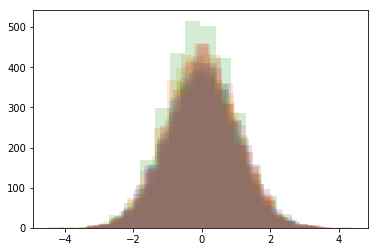

In [0]:
z = encoder(x_test)
x_recon = decoder(z).mean().numpy()
for i in range(latent_dim):
    plt.hist(z[:,i],bins=20,alpha=0.2)
plt.show()

## Decodificar, encodificar

In [0]:
z = prior.sample(sample_shape=(10))
x_recon = decoder(z).mode().numpy()
x_recon

(10, 512)